In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_fe.pkl'))

df = df.dropna()
print(len(df))
df.head()

232882


,desempenho_aluno_cat,faz_licao_casa_2.0,reprovacao_0.0,reprovacao_1.0,pai_sabe_ler_escrever_1.0,leitura_revista_comportamento_0.0,leitura_jornais_0.0,escolaridade_pai_4.0,mae_sabe_ler_escrever_1.0,leitura_internet_2.0,tempo_lazer_1.0,escolaridade_mae_4.0,gosta_estudar_disciplina_0.0,gosta_estudar_disciplina_1.0,desempenho_aluno,id_aluno,disciplina,proficiencia,erro_padrao
8086,2,True,True,False,False,True,True,False,True,True,True,False,False,True,Proficiente,23061434,LP,0.665701,0.312872
10602,0,True,False,True,True,False,False,False,False,True,True,False,False,True,Insuficiente,23065563,LP,-1.353424,0.484866
13975,0,True,False,True,True,False,False,False,False,True,True,False,False,True,Insuficiente,23065563,MT,-1.652930,0.564617
17847,0,True,True,False,False,False,False,False,True,False,False,False,False,True,Insuficiente,23065552,MT,-1.099605,0.467812
20664,0,False,False,True,True,False,False,False,True,True,False,False,True,False,Insuficiente,23095249,MT,-1.262341,0.512487


# Distribuição das Classes

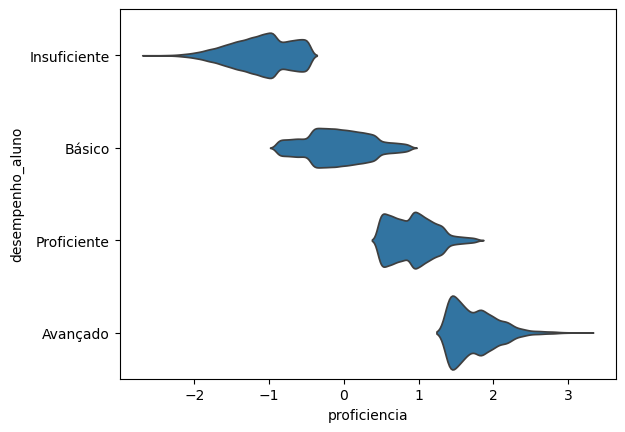

In [3]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente', 'Avançado']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=df, inner=None, order=ordem)
plt.show()

In [4]:
df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,232882.000000,232882.000000
mean,-0.284957,0.807946
std,0.796302,0.685597
min,-2.613658,0.000000
25%,-0.855624,0.000000
50%,-0.308619,1.000000
75%,0.255647,1.000000
max,3.214629,3.000000


In [27]:
# remover outliers
from sklearn.covariance import EllipticEnvelope

X = df[['proficiencia', 'desempenho_aluno_cat']]

ee = EllipticEnvelope(contamination=0.01)

ee.fit(X)

outliers = ee.predict(X) == -1

_df = df[~outliers]

df_no = _df.copy()
_df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,230553.000000,230553.000000
mean,-0.285654,0.802419
std,0.771206,0.670239
min,-2.019339,0.000000
25%,-0.847641,0.000000
50%,-0.307627,1.000000
75%,0.250377,1.000000
max,1.862621,3.000000


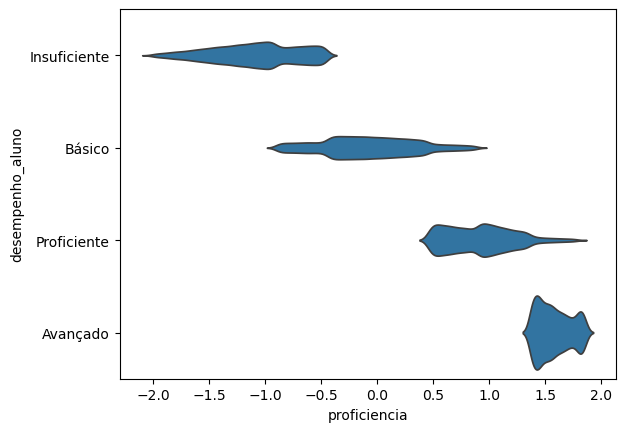

In [6]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente', 'Avançado']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=_df, inner=None, order=ordem)
plt.show()

In [7]:
# Droppando Avançado
_df = _df[_df['desempenho_aluno'] != 'Avançado']
_df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,228271.000000,228271.000000
mean,-0.304241,0.780450
std,0.752049,0.636356
min,-2.019339,0.000000
25%,-0.854334,0.000000
50%,-0.317767,1.000000
75%,0.231494,1.000000
max,1.789715,2.000000


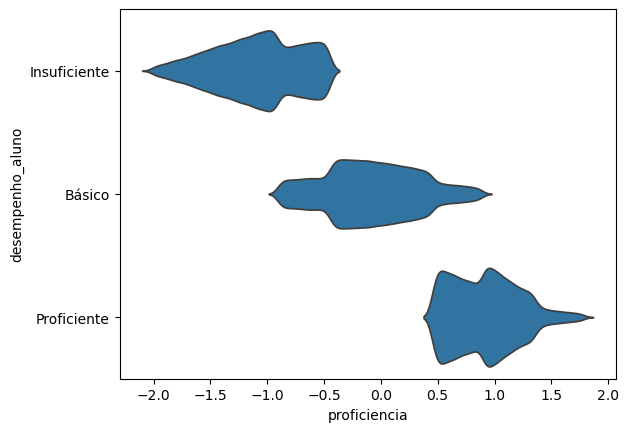

In [8]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=_df, inner=None, order=ordem)
plt.show()

<AxesSubplot: xlabel='proficiencia', ylabel='Count'>

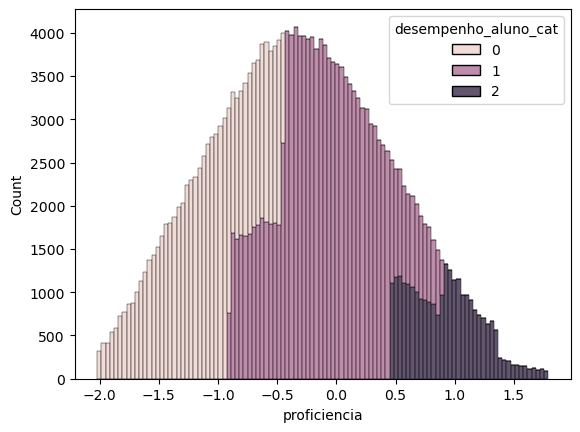

In [9]:
# histograma das proficiencias e desempenho

sns.histplot(data=_df, x='proficiencia', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='proficiencia', ylabel='Count'>

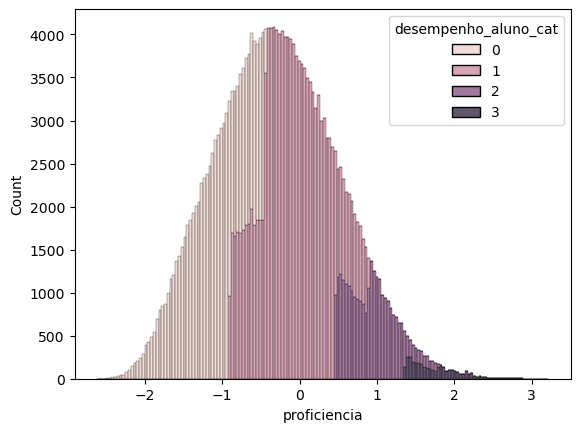

In [10]:
# desempenhos originais para comparação

sns.histplot(data=df, x='proficiencia', hue='desempenho_aluno_cat', multiple='stack')

Comparando erro padrão das classes

<AxesSubplot: xlabel='erro_padrao', ylabel='Count'>

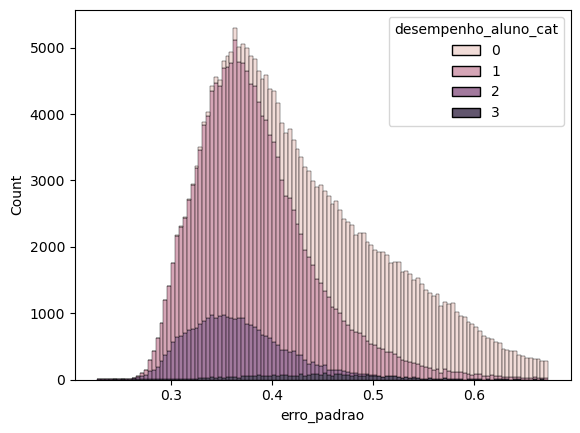

In [11]:
sns.histplot(data=df, x='erro_padrao', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='erro_padrao', ylabel='Count'>

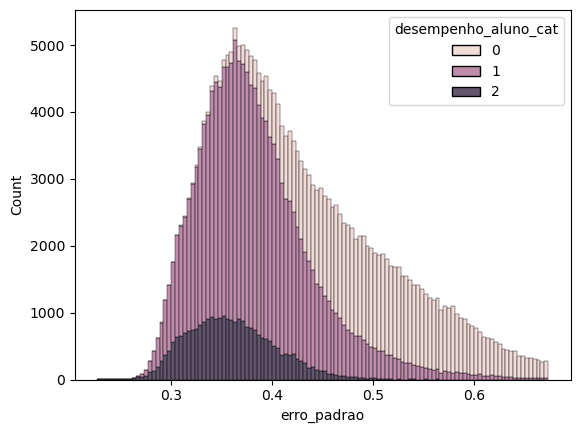

In [12]:
sns.histplot(data=_df, x='erro_padrao', hue='desempenho_aluno_cat', multiple='stack')

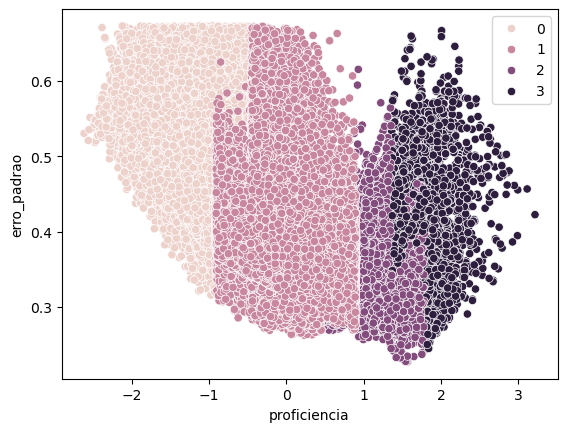

In [13]:
sns.scatterplot(data=df, x='proficiencia', y='erro_padrao', hue='desempenho_aluno_cat')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

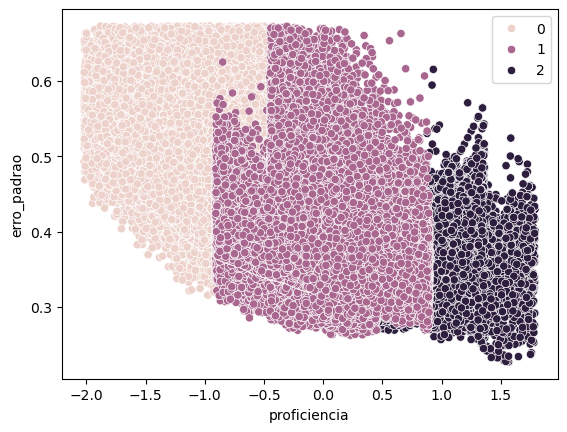

In [14]:
sns.scatterplot(data=_df, x='proficiencia', y='erro_padrao', hue='desempenho_aluno_cat')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# Aplicando PCA para ver a relação entre as variáveis

In [15]:
# valores únicos das colunas
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno', 'desempenho_aluno_cat',]

for col in _df.columns:
    if col not in exclude:
        print(col, _df[col].unique())

faz_licao_casa_2.0 [ True False]
reprovacao_0.0 [ True False]
reprovacao_1.0 [False  True]
pai_sabe_ler_escrever_1.0 [False  True]
leitura_revista_comportamento_0.0 [ True False]
leitura_jornais_0.0 [ True False]
escolaridade_pai_4.0 [False  True]
mae_sabe_ler_escrever_1.0 [ True False]
leitura_internet_2.0 [ True False]
tempo_lazer_1.0 [ True False]
escolaridade_mae_4.0 [False  True]
gosta_estudar_disciplina_0.0 [False  True]
gosta_estudar_disciplina_1.0 [ True False]


<AxesSubplot: xlabel='pca1', ylabel='pca2'>

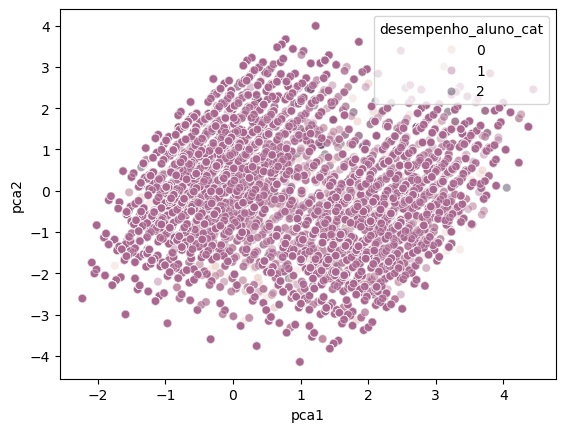

In [16]:
# aplicando PCA para redução de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = _df[[col for col in _df.columns if col not in exclude]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca_model = PCA(n_components=2)
X = pca_model.fit_transform(X)

_df.loc[:, 'pca1'] = X[:, 0]
_df.loc[:, 'pca2'] = X[:, 1]

sns.scatterplot(data=_df, x='pca1', y='pca2', hue='desempenho_aluno_cat', alpha=0.4)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


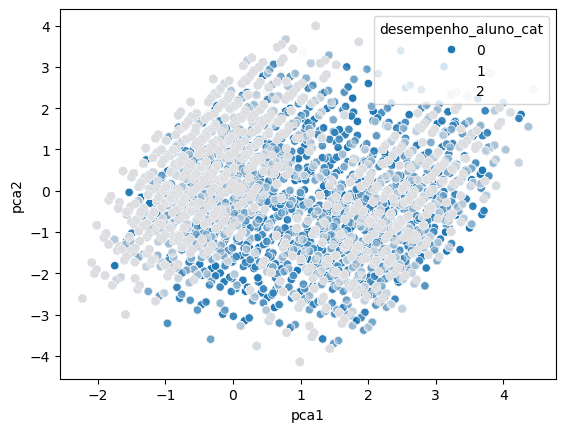

In [17]:
# applying hue only for class 0 
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', hue='desempenho_aluno_cat')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', palette='light:b', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', palette='light:b', hue='desempenho_aluno_cat', alpha=0.05)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

/usr/lib/python3/dist-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


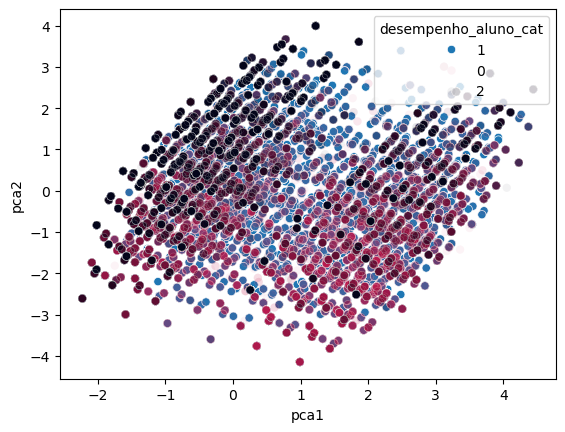

In [18]:
# applying hue only for class 1
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', hue='desempenho_aluno_cat')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


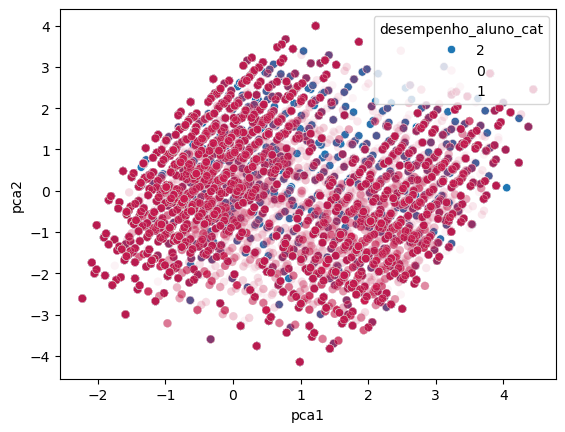

In [19]:
# applying hue only for class 2
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', hue='desempenho_aluno_cat', palette='tab10')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)

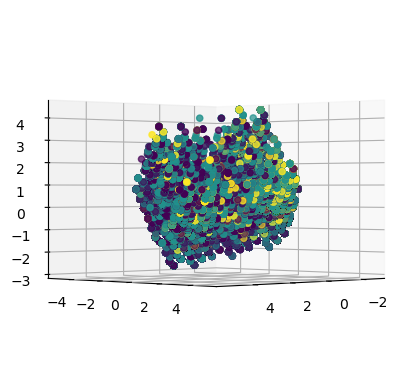

In [20]:
# PCA com 3 componentes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X = _df[[col for col in _df.columns if col not in exclude]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pca.fit_transform(X)

_df.loc[:, 'pca1'] = X[:, 0]
_df.loc[:, 'pca2'] = X[:, 1]
_df.loc[:, 'pca3'] = X[:, 2]

# plottando em 3 dimensões
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Corrigindo a chamada para ax.scatter
ax.scatter(_df['pca1'], _df['pca2'], _df['pca3'], c=_df['desempenho_aluno_cat'])

ax.view_init(elev=0, azim=45)

plt.show()

In [21]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = _df[[col for col in _df.columns if col not in exclude]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

_df['pca1'] = X_pca[:, 0]
_df['pca2'] = X_pca[:, 1]
_df['pca3'] = X_pca[:, 2]

# Criando o gráfico interativo com Plotly
fig = px.scatter_3d(
    _df, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='desempenho_aluno_cat',
    title='PCA 3D Scatter Plot'
)

# Salvar o gráfico como um arquivo HTML
fig.write_html('pca_3d_scatter_plot.html')

# Para visualizar o gráfico no navegador
import webbrowser
webbrowser.open('pca_3d_scatter_plot.html')

True

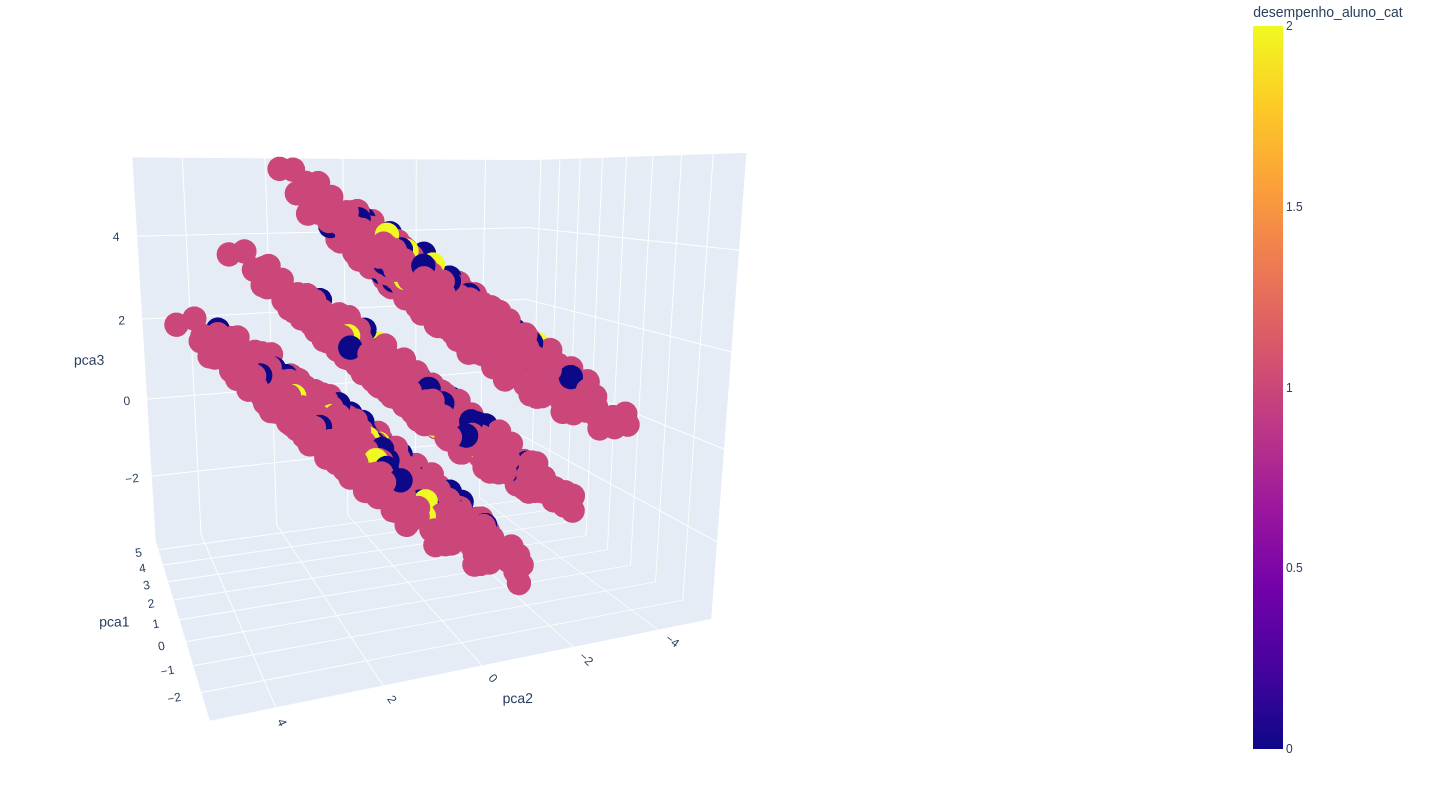
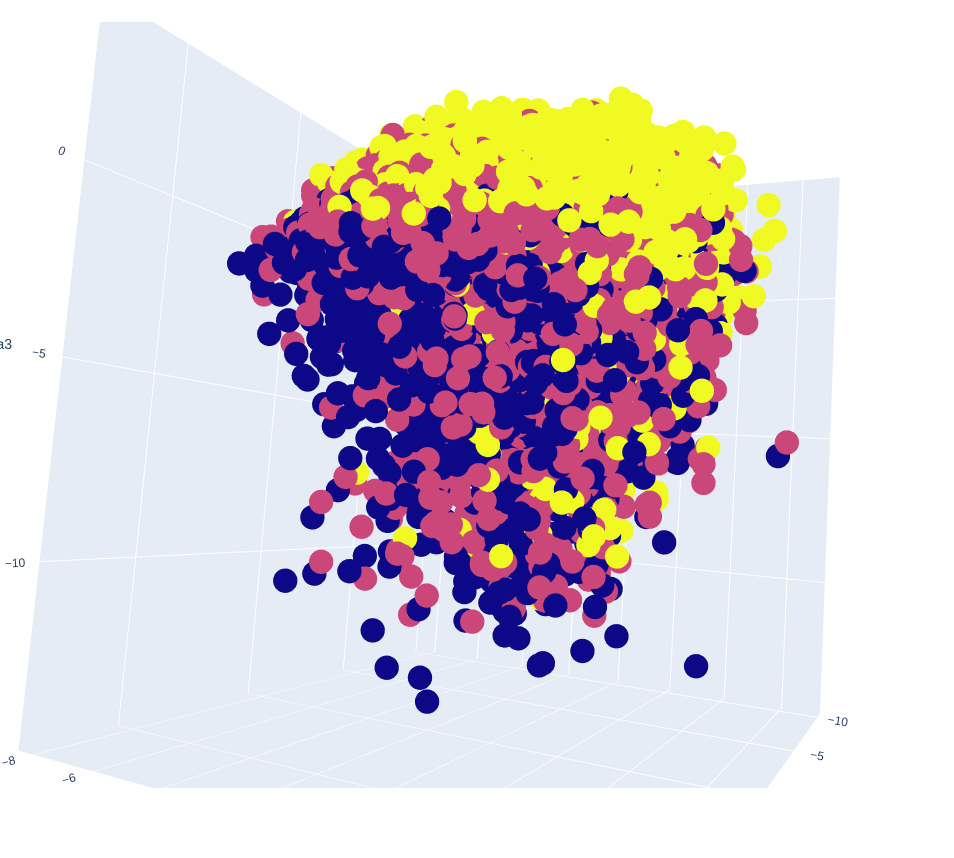

In [25]:
# pca 3d sem a classe 1

df_no = df_no[df_no['desempenho_aluno_cat'] != 1]
df_no = df_no[df_no['desempenho_aluno_cat'] != 2]

X = df_no[[col for col in df_no.columns if col not in exclude]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

df_no['pca1'] = X_pca[:, 0]
df_no['pca2'] = X_pca[:, 1]
df_no['pca3'] = X_pca[:, 2]

# Criando o gráfico interativo com Plotly
fig = px.scatter_3d(
    df_no, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='desempenho_aluno_cat',
    title='PCA 3D Scatter Plot'
)

# Salvar o gráfico como um arquivo HTML
fig.write_html('pca_3d_scatter_plot.html')

# Para visualizar o gráfico no navegador
import webbrowser
webbrowser.open('pca_3d_scatter_plot.html')

True

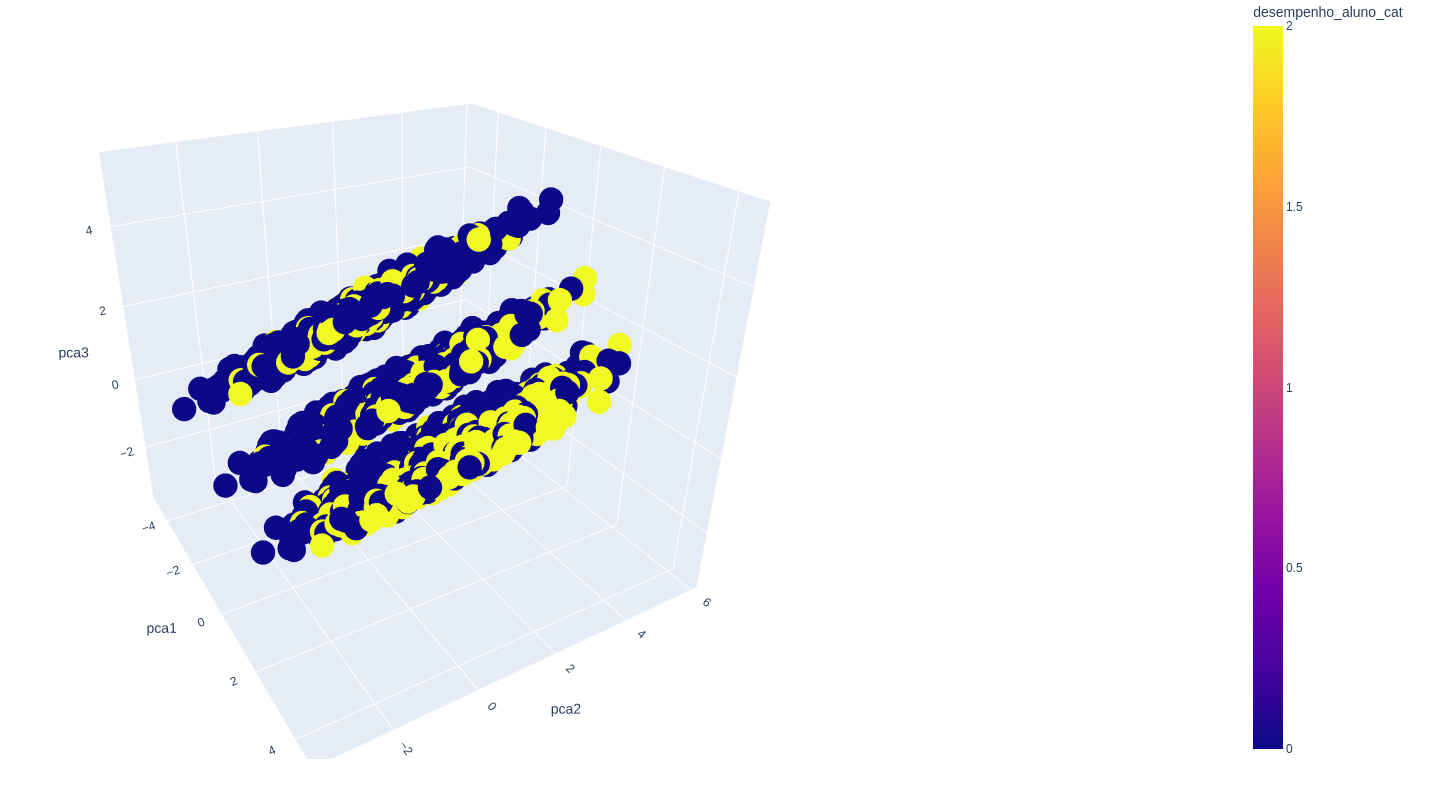